## Dynamic Programming 

### What is dynamic programming?

Dynamic programming is an optimization method which is used to solve complex problems by breaking them into subproblems. The advantage of dynamic programming is that it gives us the output for with respect to each time period where as a linear programming approach will only give us the optimal solution at the end of the time period _t_.
<br><br>
The DP works by solving the subproblem and saving it's solution. If the subproblem reoccurs, we will just use the answer from the saved memory instead of solving it again.

- Step 1: Recursion
- Step 2: Store Results
- Step 3: Backtracking

### Using dynamic programming to identify optimal power purchasing quantity in each time period

Assume we have a battery with a capacity of 5 kWh. Given below are the cost of buying and selling the energy from the grid. Also, we already know the demand for each time period. 

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [85]:
data = pd.DataFrame({'time':np.array(range(1,13)),'buying price':[8,7,10,11,12,10,8,9,11,12,10,8],'selling price':[7,6,9,10,11,9,7,8,10,11,9,7],'demand':[1,1,2,2,3,2,2,2,3,4,3,2]})
data = data.set_index('time')
data

,buying price,selling price,demand
time,,,
1,8,7,1
2,7,6,1
3,10,9,2
4,11,10,2
5,12,11,3
6,10,9,2
7,8,7,2
8,9,8,2
9,11,10,3


p_plus = Buying price <br>
p_minus = Selling price <br>
d = Demand  <br>
t = time period  <br>
B = Battery capacity  <br>
z = state of charge of battery. Max 5, min =0
$z_{0}$ = Initial energy in the battery <br>
 $\theta_{T+1} = \theta_{T+1} \left(z\right)$ : Terminal cost function: 



In [12]:
p_plus = [8,7,10,11,12,10,8,9,11,12,10,8]
p_minus = [7,6,9,10,11,9,7,8,10,11,9,7]
d=[1,1,2,2,3,2,2,2,3,4,3,2]

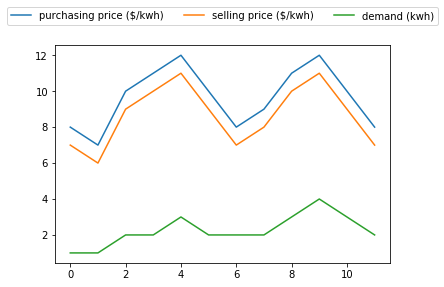

In [47]:
plt.figure()
plt.tight_layout
plt.plot(p_plus)
plt.plot(p_minus)
plt.plot(d)
plt.legend(['purchasing price ($/kwh)','selling price ($/kwh)','demand (kwh)'],loc='upper center', bbox_to_anchor=(0.5, 1.2),
           ncol=3)
plt.show()

#### Algorithm

The cost of purchasing in time period _t_ can be calculated as follows:<br>
<bR>
    
$$\text{Cost of buying - revenue from selling + penalty in the last period} \\ 
p_{T}^{+}x^{+}-p_{T}^{-}x^{-}+\theta_{T+1}\left(z+x-d_{T}\right)$$

Now, we have the battery capacity B = 5kwh and demand $d_{T}$, so we want to find an optimal _x_ for the time period _T_ which minimizes the total cost.

$$\theta_{T}\left(z\right)= \min_{0\le z+x-d_{T}\le B}\left(p_{T}^{+}x^{+}-p_{T}^{-}x^{-}+\theta_{T+1}\left(z+x-d_{T}\right)\right)$$

Once we do this for all the time periods, the equation becomes:<br>


$$\text{Objective Function} : \theta_{t}\left(z\right)= \min_{0\le\;z+x-d_{t}\le B}\left(p_{t}^{+}x^{+}-p_{t}^{-}x^{-}+\theta_{t+1}\left(z+x-d_{t}\right)\right)$$

#### Solving
- We solve starting from the last time period, i.e. $\theta_{T}(z)$ for each possible value of z and continue solving all $\theta$ till we reach $\theta_{1}(z_{0})$
- The minimum value of _x_ for all the $\theta_{T}(z)$ is saved
- We backtrack the sequence through this value, by starting from $x_{1}(z_{0})$ , i.e., how much should we buy in the first time period with initial charge in battery being $z_{0}$

##### Example

Looping through z=0..B, for t=12
$$
\begin{array}{l}
{x=d_{12}-z=2 : \cos t=p_{12}^{+} x^{+}-p_{12}^{-} x^{-} \theta_{13}\left(z+x-d_{t}\right)=8 \cdot 2+\theta_{13}(0)=16} \\ 
{x=3 : \operatorname{cost}=8 \cdot 3+\theta_{13}(1)=17} \\ 
{x=4 : \operatorname{cost}=8 \cdot 4+\theta_{13}(2)=18}\\
{\text{...}}\\
{x=B+d_{12}-z=7 : \text { cost }=8 \cdot 7+\theta_{13}(5)=21} \\ 
{\text { So } \theta_{12}(0)=16, x_{12}(0)=2}\; \left(\text{The minimum value for t =12}\right)
\end{array}$$

In [86]:
T=12
B = 5
optimal_cost = 0
cost_a = 0
var_theta = 0
var_x = 0
x = np.zeros([6,12])
theta = np.zeros([6,13])

In [124]:
for i in range(0,B+1):
    theta[i,12]=-7*i                               #Penalty for keeping energy at the end of time period t
while T>0:                                         # Loop of time t
    for i in range(0,B+1):                         #Loop of z , 0 to 6 
        theta_t =[]                                #a temporary list to save all the values of theta in time t and SOC z 
        x_temp = d[T-1]-i                          #a temporary value of x (units bought/sold) based on previous demand and i
        theta_t.append(p_plus[T-1]*max(x_temp,0)-p_minus[T-1]*max(-x_temp,0)+theta[(i+x_temp-d[T-1]),T])
        while x_temp < B+d[T-1]-i:                #we check if we have reached the total purchasing limit based on the battery capacity
            x_temp +=1
            theta_t.append(p_plus[T-1]*max(x_temp,0)-p_minus[T-1]*max(-x_temp,0)+theta[(i+x_temp-d[T-1]),T])
        theta[i,T-1] = min(theta_t)               #Save the minimum value for t and i
        index=[]     
        for g in range(0,6):                      #Identify the units via index of the minimum theta value
            if min(theta_t) == theta_t[g]:
                index.append(g)
        x[i,T-1]=max(index)-i+d[T-1]              #saving the minimum value for x
    else:
        pass      
    T=T-1
else:
    T=12

#### Power purchasing quantity

In [125]:
units = pd.DataFrame(x,columns=np.array(range(1,13)))
units.index.name = 'z'
units.style.set_caption('Units matrix for time t and battery z')

,1,2,3,4,5,6,7,8,9,10,11,12
z,,,,,,,,,,,,
0,1,6,7,7,3,2,7,7,8,4,3,2
1,0,5,6,6,2,1,6,6,7,3,2,1
2,0,4,5,5,1,0,5,5,6,2,1,0
3,0,3,4,4,0,-1,4,4,5,1,0,0
4,0,2,3,3,-1,-2,3,3,4,0,-1,0
5,0,1,2,2,-2,-3,2,2,3,-1,-2,0


#### Cost of purchasing

In [126]:
cost = pd.DataFrame(theta,columns=np.array(range(1,14)))
cost.index.name = 'z'
cost.style.set_caption('Cost Matrix for time t and battery state of charge z')

,1,2,3,4,5,6,7,8,9,10,11,12,13
z,,,,,,,,,,,,,
0,232,224,232,217,198,162,142,131,123,94,46,16,0
1,224,217,222,206,186,152,134,122,112,82,36,8,-7
2,217,210,212,195,174,142,126,113,101,70,26,0,-14
3,210,203,202,184,162,133,118,104,90,58,16,-7,-21
4,203,196,192,173,151,124,110,95,79,46,7,-14,-28
5,196,189,182,162,140,115,102,86,68,35,-2,-21,-35


### Understanding the theta matrix

- The units matrix gives us the optimal units to be purchased at each time and state of charge z combination
- The cost matrix gives us the optimal cost

- Since we have initial state of charge z=0 in time t=0, the cost matrix for $\theta_{0}(0)$ = 232<br> 
This can be interpreted as : "The optimal cost of satisfying all the demands is $232, assuming we start with initial charge of 0".

- To understand how much units to buy we need to backtrack the purchases. <br><br>
    - In period 1 we order $x_{1}(0)=1 ;$ since $d_{1}=1,$ we end the period with $z=0+1-1=0$
    - In period 2 we order $x_{2}(0)=6 ;$ since $d_{2}=1,$ we end the period with $z=0+6-1=5$
    - In period 3 we order $x_{3}(5)=2 ;$ since $d_{3}=2,$ we end the period with $z=5+2-2=5$
    - ...
    - In period 11 we order $x_{11}(0)=3 ;$ since $d_{11}=3,$ we end the period with $z=0+3-3=0$
    - In period 12 we order $x_{12}(0)=2$